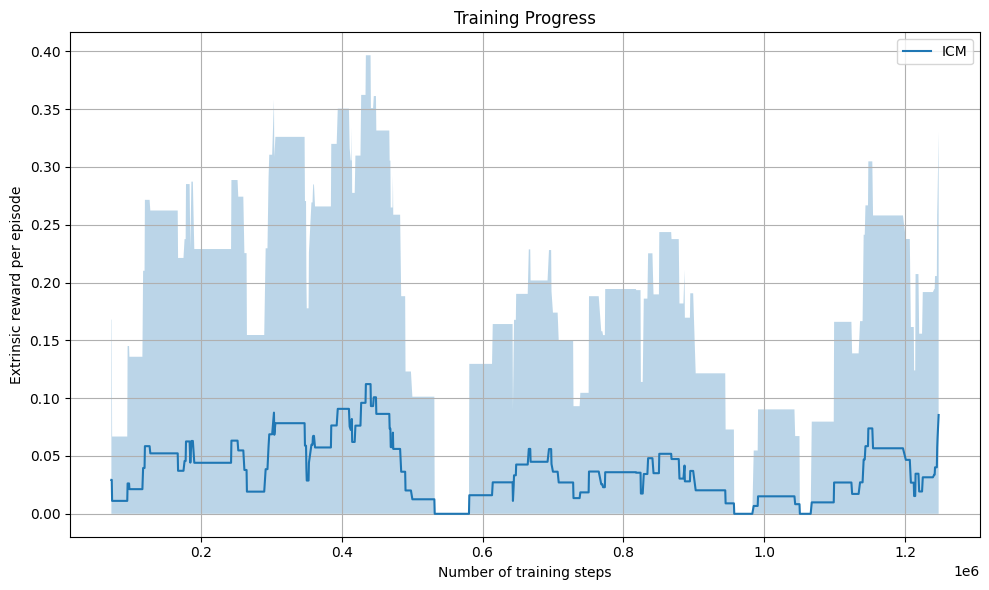

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Daten laden (CSV oder DataFrame)
icm = pd.read_csv("ICM_20250726-091537_1(1).csv")  # Spalten: 'timestamp', 'episode', 'extrinsic_reward'
icm = icm.sort_values(by='timestamp')

# Gleitendes Mittel über Rewards für Glättung (z. B. über 20 Episoden)
window_size = 50
icm['reward_smooth'] = icm['value'].rolling(window=window_size).mean()
icm['reward_std'] = icm['value'].rolling(window=window_size).std()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(icm['timestamp'], icm['reward_smooth'], label='ICM')
plt.fill_between(icm['timestamp'],
                 np.max(icm['reward_smooth'] - icm['reward_std'], 0),
                 icm['reward_smooth'] + icm['reward_std'],
                 alpha=0.3)

plt.xlabel("Number of training steps")
plt.ylabel("Extrinsic reward per episode")
plt.title("Training Progress")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
